## Import necessary libraries

In [85]:
import numpy as np
import pandas as pd
from google.colab import drive
import os
import requests

## Take news articles about bitcoin and discard other coin articles

In [87]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [88]:
path = "/content/drive/My Drive/"

In [89]:
data = pd.read_csv(path + 'crypto_news.csv')
bitcoin_price = pd.read_csv(path + 'bitcoin_price.csv')

In [ ]:
bitcoin_news = data.loc[data['subject'] == 'bitcoin']
print(bitcoin_news.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8243 entries, 5 to 26884
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       8243 non-null   object
 1   sentiment  8243 non-null   object
 2   source     8243 non-null   object
 3   subject    8243 non-null   object
 4   text       8243 non-null   object
 5   title      8243 non-null   object
 6   url        8243 non-null   object
dtypes: object(7)
memory usage: 515.2+ KB
None


In [ ]:
print(len(bitcoin_news))

9968


In [ ]:
bitcoin_news.head()

,date,sentiment,source,subject,text,title,url
5,2023-12-19 05:25:00,"{'class': 'negative', 'polarity': -0.01, 'subj...",CryptoPotato,bitcoin,Yonsei found that during BTC’s rally in early ...,Is This Why Bitcoin’s Price Rally Was Halted? ...,https://cryptopotato.com/is-this-why-bitcoins-...
6,2023-12-19 04:50:11,"{'class': 'positive', 'polarity': 0.3, 'subjec...",CryptoNews,bitcoin,Cathie Wood led ARK Invest fund sold around 80...,Cathie Wood’s Ark Invest Sells $27.6 Million i...,https://cryptonews.comhttps://cryptonews.com/n...
7,2023-12-19 04:10:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,bitcoin,Bitcoin's 150% surge pales in comparison to th...,Bitcoin Soared 150% in 2023 But These Companie...,https://cryptopotato.com/bitcoin-soared-150-in...
9,2023-12-19 02:59:59,"{'class': 'negative', 'polarity': -0.08, 'subj...",CoinTelegraph,bitcoin,The SEC has pushed back its decision on a rost...,"SEC delays several Ethereum ETFs, pushing fina...",https://cointelegraph.com/news/sec-delays-ethe...
21,2023-12-18 18:33:34,"{'class': 'negative', 'polarity': -0.27, 'subj...",CoinTelegraph,bitcoin,Bitcoin may remain under pressure for a few da...,"Price analysis 12/18: SPX, DXY, BTC, ETH, BNB,...",https://cointelegraph.com/news/price-analysis-...


In [ ]:
sentiment_column = bitcoin_news['sentiment']

In [ ]:
print(type(sentiment_column))

<class 'pandas.core.series.Series'>


## Separate the sentiment column into three separate columns (Sentiment, Polarity and Subjectivity)

In [ ]:
sentiment_col = []
polarity_col = []
subjectivity_col = []

In [ ]:
for s in sentiment_column:
    sentiment, polarity, subjectivity = s.strip('{}').split(',')
    sentiment_col.append(sentiment.strip('\'class\' :'))
    polarity_col.append(polarity.strip('\'polarity\' :'))
    subjectivity_col.append(subjectivity.strip('\'subjectivity\' :'))

In [ ]:
print(sentiment_col)

['negative', 'positive', 'neutr', 'negative', 'negative', 'neutr', 'positive', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'neutr', 'positive', 'positive', 'positive', 'neutr', 'negative', 'positive', 'positive', 'positive', 'neutr', 'positive', 'negative', 'negative', 'positive', 'negative', 'neutr', 'neutr', 'positive', 'negative', 'negative', 'neutr', 'negative', 'positive', 'negative', 'neutr', 'negative', 'neutr', 'negative', 'neutr', 'negative', 'positive', 'neutr', 'neutr', 'positive', 'negative', 'neutr', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'neutr', 'neutr', 'positive', 'negative', 'positive', 'neutr', 'positive', 'positive', 'negative', 'neutr', 'positive', 'neutr', 'negative', 'positive', 'neutr', 'positive', 'neutr', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'posit

In [ ]:
bitcoin_news.drop('sentiment', axis=1, inplace=True)

<ipython-input-8-a01ff0e1fc65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_news.drop('sentiment', axis=1, inplace=True)


In [ ]:
bitcoin_news['sentiment'] = sentiment_col
bitcoin_news['polarity'] = polarity_col
bitcoin_news['subjectivity'] = subjectivity_col

<ipython-input-9-9ebadc370530>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_news['sentiment'] = sentiment_col
<ipython-input-9-9ebadc370530>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_news['polarity'] = polarity_col
<ipython-input-9-9ebadc370530>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
bitcoin_news.head()

,date,source,subject,text,title,url,sentiment,polarity,subjectivity
5,2023-12-19 05:25:00,CryptoPotato,bitcoin,Yonsei found that during BTC s rally in early ...,Is This Why Bitcoin s Price Rally Was Halted ...,https://cryptopotato.com/is-this-why-bitcoins-...,negative,-0.01,0.38
6,2023-12-19 04:50:11,CryptoNews,bitcoin,Cathie Wood led ARK Invest fund sold around ...,Cathie Wood s Ark Invest Sells Million i...,https://cryptonews.comhttps://cryptonews.com/n...,positive,0.3,0.1
7,2023-12-19 04:10:00,CryptoPotato,bitcoin,Bitcoin s surge pales in comparison to th...,Bitcoin Soared in But These Companie...,https://cryptopotato.com/bitcoin-soared-150-in...,neutr,0.0,0.0
9,2023-12-19 02:59:59,CoinTelegraph,bitcoin,The SEC has pushed back its decision on a rost...,SEC delays several Ethereum ETFs pushing fina...,https://cointelegraph.com/news/sec-delays-ethe...,negative,-0.08,0.64
21,2023-12-18 18:33:34,CoinTelegraph,bitcoin,Bitcoin may remain under pressure for a few da...,Price analysis SPX DXY BTC ETH BNB ...,https://cointelegraph.com/news/price-analysis-...,negative,-0.27,0.33


## Convert all characters to lowercase and remove special characters

In [ ]:
x = bitcoin_news.iloc[:,3:5]
x.replace("[^a-zA-Z]", " ", regex=True, inplace=True)
for cols in x.columns:
    x[cols] = x[cols].apply(lambda s: s.lower() if isinstance(s, str) else s)

In [ ]:
print(x.head())

                                                 text  \
5   yonsei found that during btc s rally in early ...   
6   cathie wood led ark invest fund sold around   ...   
7   bitcoin s      surge pales in comparison to th...   
9   the sec has pushed back its decision on a rost...   
21  bitcoin may remain under pressure for a few da...   

                                                title  
5   is this why bitcoin s price rally was halted  ...  
6   cathie wood s ark invest sells       million i...  
7   bitcoin soared      in      but these companie...  
9   sec delays several ethereum etfs  pushing fina...  
21  price analysis        spx  dxy  btc  eth  bnb ...  


In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
vader_scores = []
for text in x['text']:
    vader_scores.append(analyzer.polarity_scores(text))

In [ ]:
sentiment = []
for score in vader_scores:
    if score['compound'] >= 0.05:
        sentiment.append('positive')
    elif score['compound'] > -0.05 and score['compound'] < 0.05:
        sentiment.append('neutral')
    elif score['compound'] <= -0.05:
        sentiment.append('negative')

In [ ]:
bitcoin_news['sentiment'] = bitcoin_news['sentiment'].replace('neutr', 'neutral')

<ipython-input-16-7f6ac169f800>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_news['sentiment'] = bitcoin_news['sentiment'].replace('neutr', 'neutral')


In [ ]:
index = 0
false_count = 0
true_count = 0
for vader_sentiment in sentiment:
    if vader_sentiment == bitcoin_news['sentiment'].iloc[index]:
        true_count+=1
    else:
        false_count+=1

In [ ]:
print(true_count)

2573


In [ ]:
print(false_count)

7395


In [ ]:
bitcoin_news['vader_sentiment'] = sentiment

<ipython-input-18-d4fca72909f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_news['vader_sentiment'] = sentiment


In [ ]:
bitcoin_news['vader_sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [ ]:
bitcoin_news = bitcoin_news.rename(columns = {"sentiment" : "textblob_sentiment"})

In [ ]:
bitcoin_news.head()

,date,source,subject,text,title,url,textblob_sentiment,polarity,subjectivity,vader_sentiment
5,2023-12-19 05:25:00,CryptoPotato,bitcoin,Yonsei found that during BTC’s rally in early ...,Is This Why Bitcoin’s Price Rally Was Halted? ...,https://cryptopotato.com/is-this-why-bitcoins-...,negative,-0.01,0.38,positive
6,2023-12-19 04:50:11,CryptoNews,bitcoin,Cathie Wood led ARK Invest fund sold around 80...,Cathie Wood’s Ark Invest Sells $27.6 Million i...,https://cryptonews.comhttps://cryptonews.com/n...,positive,0.3,0.1,positive
7,2023-12-19 04:10:00,CryptoPotato,bitcoin,Bitcoin's 150% surge pales in comparison to th...,Bitcoin Soared 150% in 2023 But These Companie...,https://cryptopotato.com/bitcoin-soared-150-in...,neutral,0.0,0.0,positive
9,2023-12-19 02:59:59,CoinTelegraph,bitcoin,The SEC has pushed back its decision on a rost...,"SEC delays several Ethereum ETFs, pushing fina...",https://cointelegraph.com/news/sec-delays-ethe...,negative,-0.08,0.64,positive
21,2023-12-18 18:33:34,CoinTelegraph,bitcoin,Bitcoin may remain under pressure for a few da...,"Price analysis 12/18: SPX, DXY, BTC, ETH, BNB,...",https://cointelegraph.com/news/price-analysis-...,negative,-0.27,0.33,negative


In [ ]:
bitcoin_news.dtypes

date                  object
source                object
subject               object
text                  object
title                 object
url                   object
textblob_sentiment    object
polarity              object
subjectivity          object
vader_sentiment       object
dtype: object

In [ ]:
bitcoin_news['polarity'] = pd.to_numeric(bitcoin_news['polarity'])

In [ ]:
bitcoin_news['subjectivity'] = pd.to_numeric(bitcoin_news['subjectivity'])

In [ ]:
bitcoin_news['date'] = pd.to_datetime(bitcoin_news['date'])

In [ ]:
def parse(x):
    return x.strftime("%d/%m/%Y")

bitcoin_news["date"] = list(map(parse, bitcoin_news["date"]))

In [ ]:
bitcoin_news.head()

,date,source,subject,text,title,url,textblob_sentiment,polarity,subjectivity,vader_sentiment
5,19/12/2023,CryptoPotato,bitcoin,Yonsei found that during BTC’s rally in early ...,Is This Why Bitcoin’s Price Rally Was Halted? ...,https://cryptopotato.com/is-this-why-bitcoins-...,negative,-0.01,0.38,positive
6,19/12/2023,CryptoNews,bitcoin,Cathie Wood led ARK Invest fund sold around 80...,Cathie Wood’s Ark Invest Sells $27.6 Million i...,https://cryptonews.comhttps://cryptonews.com/n...,positive,0.30,0.10,positive
7,19/12/2023,CryptoPotato,bitcoin,Bitcoin's 150% surge pales in comparison to th...,Bitcoin Soared 150% in 2023 But These Companie...,https://cryptopotato.com/bitcoin-soared-150-in...,neutral,0.00,0.00,positive
9,19/12/2023,CoinTelegraph,bitcoin,The SEC has pushed back its decision on a rost...,"SEC delays several Ethereum ETFs, pushing fina...",https://cointelegraph.com/news/sec-delays-ethe...,negative,-0.08,0.64,positive
21,18/12/2023,CoinTelegraph,bitcoin,Bitcoin may remain under pressure for a few da...,"Price analysis 12/18: SPX, DXY, BTC, ETH, BNB,...",https://cointelegraph.com/news/price-analysis-...,negative,-0.27,0.33,negative


In [ ]:
bitcoin_news.dtypes

date                   object
source                 object
subject                object
text                   object
title                  object
url                    object
textblob_sentiment     object
polarity              float64
subjectivity          float64
vader_sentiment        object
dtype: object

In [90]:
bitcoin_prices = pd.read_csv(path + 'bitcoin_price.csv')

In [ ]:
bitcoin_prices.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/22/2024,63389.0,NaN,65968.6,64324.3,63074.9
1,03/21/2024,65947.2,NaN,66746.4,66133.9,65151.8
2,03/20/2024,66467.4,NaN,61826.5,68161.7,66463.6
3,03/19/2024,62428.4,NaN,65860.5,63397.2,61859.5
4,03/18/2024,65734.7,NaN,67951.4,68099.6,64940.6


In [ ]:
bitcoin_prices = bitcoin_prices.drop('Volume', axis=1)

In [ ]:
bitcoin_prices.iloc[-1]

Date          03/08/2019
Close/Last        3865.9
Open              3875.1
High              3929.0
Low               3810.7
Name: 1768, dtype: object

In [ ]:
bitcoin_prices.columns = ['date','close/last','open','high','low']

In [ ]:
dataset = pd.merge(bitcoin_news, bitcoin_prices, on="date")

In [ ]:
dataset.head()

,date,source,subject,text,title,url,textblob_sentiment,polarity,subjectivity,vader_sentiment,close/last,open,high,low
0,12/12/2023,CoinTelegraph,bitcoin,"Bitcoin bulls expectations of $50,000 and high...",Bitcoin derivatives data points to traders' $5...,https://cointelegraph.com/news/bitcoin-derivat...,positive,0.25,0.50,neutral,40901.2,41395.9,41496.4,40649.3
1,12/12/2023,CryptoNews,bitcoin,As the US announces its latest core inflation ...,Bitcoin Price Prediction as US Core Inflation ...,https://cryptonews.comhttps://cryptonews.com/n...,positive,0.22,0.52,positive,40901.2,41395.9,41496.4,40649.3
2,12/12/2023,CryptoPotato,bitcoin,The decline in BTC supply on exchange is consi...,Bitcoin Supply on Exchanges at 6-Year Low as B...,https://cryptopotato.com/bitcoin-supply-on-exc...,neutral,0.00,0.00,positive,40901.2,41395.9,41496.4,40649.3
3,12/12/2023,CoinTelegraph,bitcoin,Bitcoin is nowhere near done with its bull mar...,'Take some rest and GO' — Bitcoin price copies...,https://cointelegraph.com/news/bitcoin-price-c...,positive,0.05,0.20,positive,40901.2,41395.9,41496.4,40649.3
4,12/12/2023,CoinTelegraph,bitcoin,Major Coinbase shareholders have sold over $14...,Coinbase co-founder Fred Ehrsam sells $13 mill...,https://cointelegraph.com/news/coinbase-co-fou...,negative,-0.09,0.38,neutral,40901.2,41395.9,41496.4,40649.3


In [ ]:
mapping = {'positive': 1, 'neutral': 0, 'negative': -1}

columns = ['vader_sentiment', 'textblob_sentiment']
for column in columns:
    new_col = column + "_encoded"
    dataset[new_col] = dataset[column].map(mapping)

In [ ]:
dataset['vader_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [ ]:
dataset.head()

,date,source,subject,text,title,url,textblob_sentiment,polarity,subjectivity,vader_sentiment,close/last,open,high,low,vader_sentiment_encoded,textblob_sentiment_encoded
0,12/12/2023,CoinTelegraph,bitcoin,"Bitcoin bulls expectations of $50,000 and high...",Bitcoin derivatives data points to traders' $5...,https://cointelegraph.com/news/bitcoin-derivat...,positive,0.25,0.50,neutral,40901.2,41395.9,41496.4,40649.3,0,1
1,12/12/2023,CryptoNews,bitcoin,As the US announces its latest core inflation ...,Bitcoin Price Prediction as US Core Inflation ...,https://cryptonews.comhttps://cryptonews.com/n...,positive,0.22,0.52,positive,40901.2,41395.9,41496.4,40649.3,1,1
2,12/12/2023,CryptoPotato,bitcoin,The decline in BTC supply on exchange is consi...,Bitcoin Supply on Exchanges at 6-Year Low as B...,https://cryptopotato.com/bitcoin-supply-on-exc...,neutral,0.00,0.00,positive,40901.2,41395.9,41496.4,40649.3,1,0
3,12/12/2023,CoinTelegraph,bitcoin,Bitcoin is nowhere near done with its bull mar...,'Take some rest and GO' — Bitcoin price copies...,https://cointelegraph.com/news/bitcoin-price-c...,positive,0.05,0.20,positive,40901.2,41395.9,41496.4,40649.3,1,1
4,12/12/2023,CoinTelegraph,bitcoin,Major Coinbase shareholders have sold over $14...,Coinbase co-founder Fred Ehrsam sells $13 mill...,https://cointelegraph.com/news/coinbase-co-fou...,negative,-0.09,0.38,neutral,40901.2,41395.9,41496.4,40649.3,0,-1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
corr_features = ['polarity','subjectivity','close/last', 'open', 'high', 'low',"vader_sentiment_encoded", "textblob_sentiment_encoded"]

In [ ]:
corr_matrix = dataset[corr_features].corr()

<Axes: >

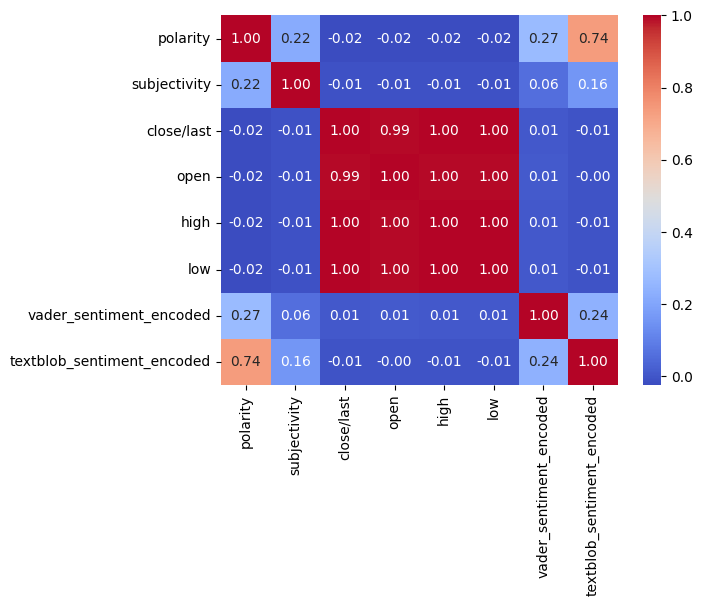

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
features = ['date','close/last', 'open', 'high', 'low']
#features = ['date', 'close/last']

In [ ]:
values = dataset[features]

In [ ]:
values['date'] = pd.to_datetime(values['date'])

<ipython-input-40-3c646f190c22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['date'] = pd.to_datetime(values['date'])


In [ ]:
values.dtypes

date          datetime64[ns]
close/last           float64
open                 float64
high                 float64
low                  float64
dtype: object

In [ ]:
!pip install keras

In [ ]:
from sklearn.model_selection import train_test_split
from datetime import datetime

split_percentage = 0.80  # 80% train, 20% test
split_index = int(len(values) * split_percentage)

lstm_data = values[['date','close/last', 'open', 'high','low']]

X = lstm_data.drop('close/last', axis=1)
y = lstm_data['close/last']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split_percentage, shuffle=False)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train['date'] = X_train['date'].apply(lambda x: x.timestamp())
X_test['date'] = X_test['date'].apply(lambda x: x.timestamp())
y_train = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_test = scaler.fit_transform(y_test.to_numpy().reshape(-1, 1)).flatten()

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

#Process lstm_data from dataframe to lstm input
lstm_train_data = scaler.fit_transform(X_train)
lstm_test_data = scaler.fit_transform(X_test)
lstm_train_data = lstm_train_data.reshape((lstm_train_data.shape[0], 1, lstm_train_data.shape[1]))
lstm_test_data = lstm_test_data.reshape((lstm_test_data.shape[0], 1, lstm_test_data.shape[1]))

Epoch 1/50
35/35 - 6s - loss: 0.4403 - val_loss: 0.4417 - 6s/epoch - 161ms/step
Epoch 2/50
35/35 - 0s - loss: 0.3518 - val_loss: 0.3592 - 243ms/epoch - 7ms/step
Epoch 3/50
35/35 - 0s - loss: 0.2656 - val_loss: 0.2984 - 174ms/epoch - 5ms/step
Epoch 4/50
35/35 - 0s - loss: 0.1849 - val_loss: 0.2575 - 331ms/epoch - 9ms/step
Epoch 5/50
35/35 - 0s - loss: 0.1325 - val_loss: 0.2271 - 270ms/epoch - 8ms/step
Epoch 6/50
35/35 - 0s - loss: 0.1162 - val_loss: 0.2035 - 291ms/epoch - 8ms/step
Epoch 7/50
35/35 - 1s - loss: 0.1033 - val_loss: 0.1783 - 584ms/epoch - 17ms/step
Epoch 8/50
35/35 - 1s - loss: 0.0884 - val_loss: 0.1486 - 640ms/epoch - 18ms/step
Epoch 9/50
35/35 - 1s - loss: 0.0712 - val_loss: 0.1133 - 753ms/epoch - 22ms/step
Epoch 10/50
35/35 - 1s - loss: 0.0511 - val_loss: 0.0726 - 576ms/epoch - 16ms/step
Epoch 11/50
35/35 - 1s - loss: 0.0301 - val_loss: 0.0374 - 623ms/epoch - 18ms/step
Epoch 12/50
35/35 - 0s - loss: 0.0171 - val_loss: 0.0291 - 405ms/epoch - 12ms/step
Epoch 13/50
35/35 - 

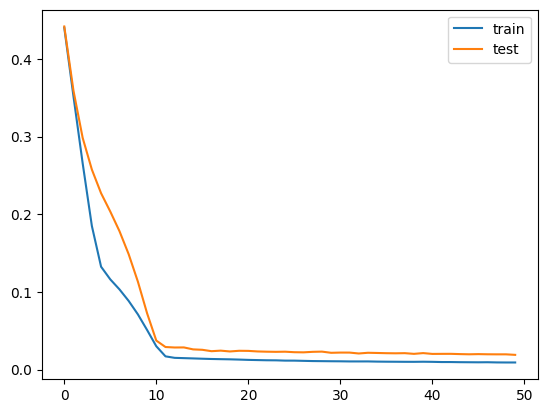

In [ ]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot

model = Sequential()
model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

history = model.fit(lstm_train_data, y_train, epochs=50, batch_size=72, validation_data=(lstm_test_data, y_test), verbose=2, shuffle=True)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from math import sqrt
from numpy import concatenate
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

yhat = model.predict(lstm_test_data)

20/20 [==============================] - 0s 4ms/step


In [ ]:
lstm_mse = mean_squared_error(y_test, yhat)

In [ ]:
lstm_rmse = np.sqrt(lstm_mse)

In [ ]:
lstm_r2_score = r2_score(y_test, yhat)

In [ ]:
lstm_mae = mean_absolute_error(y_test, yhat)

In [ ]:
lstm_mape = mean_absolute_percentage_error(y_test, yhat)

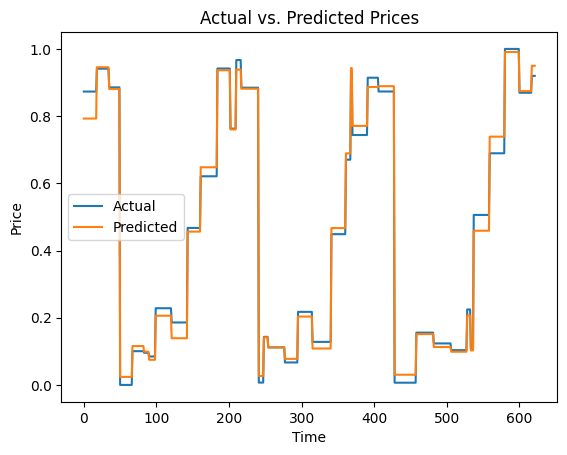

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted pollution
plt.plot(y_test, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

In [ ]:
SEED = 1

In [ ]:
time_step = 1

In [ ]:
lstm_test_data.shape

(622, 1, 4)

In [ ]:
lstm_cnn_train_data = lstm_train_data[:, :, -1]

In [ ]:
lstm_cnn_test_data = lstm_test_data[:, :, -1]

In [ ]:
lstm_cnn_train_data = lstm_cnn_train_data.reshape(lstm_cnn_train_data.shape[0], 1, lstm_cnn_train_data.shape[1])
lstm_cnn_test_data = lstm_cnn_test_data.reshape(lstm_cnn_test_data.shape[0], 1, lstm_cnn_test_data.shape[1])

In [ ]:
# define the 2D-CNN-LSTM model
def build_model(ishape):
    # random seed generator for reducibility
    print(ishape)
    tf.random.set_seed(SEED)
    random.seed(SEED)

    # initialize parameter
    kernel_init = tf.keras.initializers.GlorotNormal(seed=SEED)
    bias_init = tf.keras.initializers.Constant(value=0.1)

    model = Sequential()
    # input layer
    model.add(InputLayer(input_shape=ishape))
    # conv1D Layer
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', padding='same',
                     kernel_initializer=kernel_init, bias_initializer=bias_init))
    # dropout Layer
    model.add(Dropout(0.062))
    # reshape layer
    model.add(Reshape((-1, 128)))  # Reshape to (-1, num_features)
    # LSTM Layer
    model.add(LSTM(units=130, kernel_initializer=kernel_init, bias_initializer=bias_init))
    # dense Layer
    model.add(Dense(units=122, kernel_initializer=kernel_init, bias_initializer=bias_init))
    # output Layer
    model.add(Dense(units=1))
    # compile the model
    model.compile(optimizer=Adam(learning_rate=0.0028), loss='mse')

    return model

In [ ]:
cnn_lstm_model = build_model((1, 1, 1))

(1, 1, 1)


In [ ]:
cnn_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 1, 128)         512       
                                                                 
 dropout (Dropout)           (None, 1, 1, 128)         0         
                                                                 
 reshape (Reshape)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 130)               134680    
                                                                 
 dense_1 (Dense)             (None, 122)               15982     
                                                                 
 dense_2 (Dense)             (None, 1)                 123       
                                                                 
Total params: 151297 (591.00 KB)
Trainable params: 151

Epoch 1/50
35/35 - 5s - loss: 0.0627 - val_loss: 0.0016 - 5s/epoch - 130ms/step
Epoch 2/50
35/35 - 0s - loss: 0.0040 - val_loss: 0.0011 - 306ms/epoch - 9ms/step
Epoch 3/50
35/35 - 0s - loss: 0.0011 - val_loss: 7.3132e-04 - 304ms/epoch - 9ms/step
Epoch 4/50
35/35 - 0s - loss: 8.0093e-04 - val_loss: 7.1709e-04 - 288ms/epoch - 8ms/step
Epoch 5/50
35/35 - 0s - loss: 7.5832e-04 - val_loss: 5.5219e-04 - 332ms/epoch - 9ms/step
Epoch 6/50
35/35 - 0s - loss: 7.9766e-04 - val_loss: 5.6779e-04 - 280ms/epoch - 8ms/step
Epoch 7/50
35/35 - 0s - loss: 7.9581e-04 - val_loss: 6.4229e-04 - 276ms/epoch - 8ms/step
Epoch 8/50
35/35 - 0s - loss: 7.4901e-04 - val_loss: 6.6222e-04 - 330ms/epoch - 9ms/step
Epoch 9/50
35/35 - 0s - loss: 7.1830e-04 - val_loss: 5.5379e-04 - 285ms/epoch - 8ms/step
Epoch 10/50
35/35 - 0s - loss: 6.9864e-04 - val_loss: 8.4033e-04 - 311ms/epoch - 9ms/step
Epoch 11/50
35/35 - 0s - loss: 7.1080e-04 - val_loss: 7.0614e-04 - 338ms/epoch - 10ms/step
Epoch 12/50
35/35 - 0s - loss: 7.1744e-

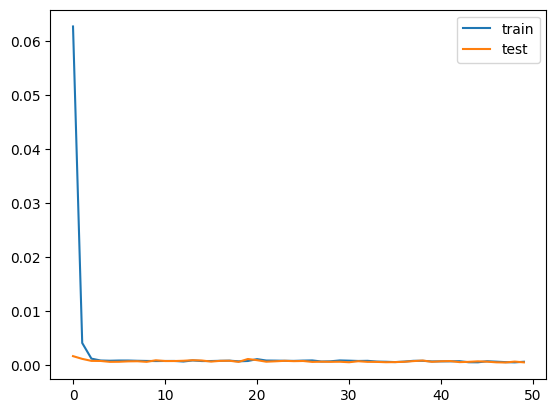

In [ ]:
history = cnn_lstm_model.fit(lstm_cnn_train_data, y_train, epochs=50, batch_size=72, validation_data=(lstm_cnn_test_data, y_test), verbose=2, shuffle=False)

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from math import sqrt
from numpy import concatenate

yhat = cnn_lstm_model.predict(lstm_cnn_test_data)

20/20 [==============================] - 1s 5ms/step


In [ ]:
lstm_cnn_mse = mean_squared_error(y_test, yhat)

In [ ]:
lstm_cnn_rmse = np.sqrt(lstm_cnn_mse)

In [ ]:
lstm_cnn_r2_score = r2_score(y_test, yhat)

In [ ]:
lstm_cnn_mae = mean_absolute_error(y_test, yhat)

In [ ]:
lstm_cnn_mape = mean_absolute_percentage_error(y_test, yhat)

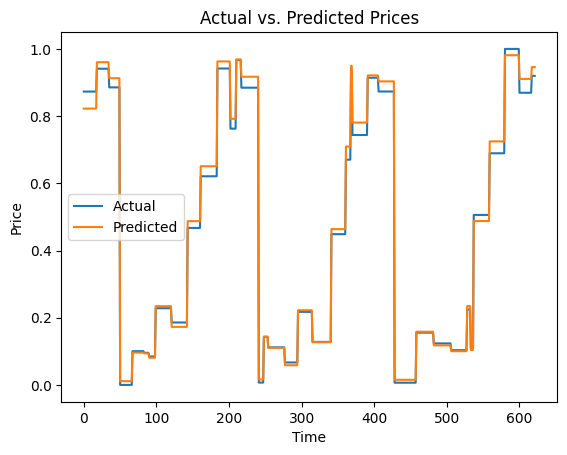

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted pollution
plt.plot(y_test, label='Actual')
plt.plot(yhat, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras import layers

In [ ]:
SEED = 1
tf.random.set_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

In [ ]:
def build_gru_cnn_model(filters, gru_units, dense_units_layer_1and2, dense_units_layer3, dropout_rate, learning_rate):
    # random seed generator for reducibility
    tf.random.set_seed(SEED)
    random.seed(SEED)
    np.random.seed(SEED)

    # initialize parameter
    kernel_init = tf.keras.initializers.GlorotNormal(seed=SEED)
    bias_init = tf.keras.initializers.Constant(value=0.1)

    # input layer
    input_layer = layers.Input(shape=(1, 1))

    # input will be passed to gru layer and convolutional layer
    # input layer followed by gru layer
    gru_layer = layers.GRU(units=gru_units, return_sequences=True, activation='tanh',
                           kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)

    # input layer followed by convolutional layer
    conv1d_layer = layers.Conv1D(filters=filters, kernel_size=1, activation='relu', kernel_initializer=kernel_init,
                                 bias_initializer=bias_init)(input_layer)

    # features from gru and convolutional layers are passed to dense layer each with the same number of dense units
    # gru layer followed by dense layer 1
    dense_layer1 = layers.Dense(units=dense_units_layer_1and2, kernel_initializer=kernel_init, activation='tanh',
                               bias_initializer=bias_init)(gru_layer)

    # convolutioal layer followed dense layer 2
    dense_layer2 = layers.Dense(units=dense_units_layer_1and2, kernel_initializer=kernel_init, activation='tanh',
                                bias_initializer=bias_init)(conv1d_layer)

    # features from dense layer 1 and dense layer 2 are concatenated
    # both layers having the same number of units allow them to be concatenated
    concat = layers.Concatenate(axis=2)([dense_layer1, dense_layer2])

    # dropout layer
    dropout_layer = layers.Dropout(dropout_rate)(concat)

    # flatten layer (3D to 2D)
    flatten_layer = layers.Flatten()(dropout_layer)

    # dense layer
    dense_layer3 = layers.Dense(units=dense_units_layer3, kernel_initializer=kernel_init, activation='tanh',
                                bias_initializer=bias_init)(flatten_layer)

    # output layer
    output_layer = layers.Dense(units=1)(dense_layer3)

    # Define the model with input and output layers
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    return model

In [ ]:
X_train = lstm_cnn_train_data
X_test = lstm_cnn_test_data

In [ ]:
gru_cnn = build_gru_cnn_model(filters=144, gru_units=80, dense_units_layer_1and2=160,
                              dense_units_layer3=112, dropout_rate=0.2, learning_rate=0.0001)

Epoch 1/95
39/39 [==============================] - 7s 30ms/step - loss: 0.0662 - val_loss: 0.0300
Epoch 2/95
39/39 [==============================] - 0s 12ms/step - loss: 0.0177 - val_loss: 0.0034
Epoch 3/95
39/39 [==============================] - 1s 15ms/step - loss: 0.0111 - val_loss: 0.0017
Epoch 4/95
39/39 [==============================] - 0s 10ms/step - loss: 0.0095 - val_loss: 0.0017
Epoch 5/95
39/39 [==============================] - 1s 17ms/step - loss: 0.0082 - val_loss: 0.0021
Epoch 6/95
39/39 [==============================] - 1s 14ms/step - loss: 0.0073 - val_loss: 0.0012
Epoch 7/95
39/39 [==============================] - 1s 14ms/step - loss: 0.0065 - val_loss: 0.0012
Epoch 8/95
39/39 [==============================] - 1s 18ms/step - loss: 0.0060 - val_loss: 8.0411e-04
Epoch 9/95
39/39 [==============================] - 1s 17ms/step - loss: 0.0054 - val_loss: 9.1464e-04
Epoch 10/95
39/39 [==============================] - 1s 23ms/step - loss: 0.0048 - val_loss: 6.8194e-

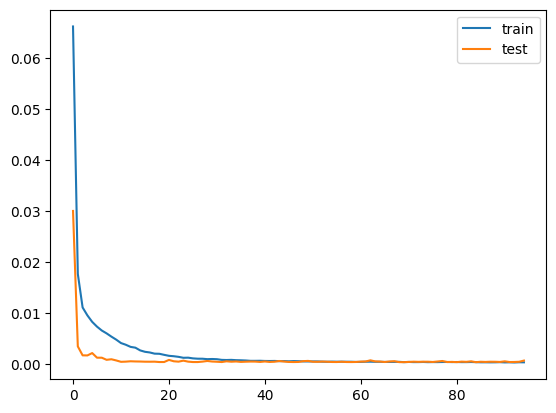

In [ ]:
history = gru_cnn.fit(X_train, y_train, epochs=95, validation_data=(X_test, y_test), batch_size=64, verbose=1)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
y_test_prediction = gru_cnn.predict(X_test, verbose = 1)

20/20 [==============================] - 1s 3ms/step


In [ ]:
gru_r2_score = r2_score(y_test, y_test_prediction) # R2 score is between 0 and 1 (closer to 1 indicates better model)

In [ ]:
gru_mse_score = mean_squared_error(y_test, y_test_prediction)

In [ ]:
gru_mape_score = mean_absolute_percentage_error(y_test, y_test_prediction) # a lower MAPE indicates better model

In [ ]:
gru_rmse_score = np.sqrt(gru_mse_score) # a lower RMSE indicates better model

In [ ]:
gru_mae_score = mean_absolute_error(y_test, y_test_prediction) # a lower MAE indicates better model

In [ ]:
print("LSTM R2 score: ", lstm_r2_score)
print("LSTM MAE: ", lstm_mae)
print("LSTM MAPE: ", lstm_mape)
print("LSTM MSE: ", lstm_mse)
print("LSTM RMSE: ", lstm_rmse)
print("-----------------------------------------")
print("LSTM-CNN R2 score: ", lstm_cnn_r2_score)
print("LSTM-CNN MAE: ", lstm_cnn_mae)
print("LSTM-CNN MAPE: ", lstm_cnn_mape)
print("LSTM-CNN MSE: ", lstm_cnn_mse)
print("LSTM-CNN RMSE: ", lstm_cnn_rmse)
print("-----------------------------------------")
print("GRU R2 score: ", gru_r2_score)
print("GRU MAE: ", gru_mae_score)
print("GRU MAPE: ", gru_mape_score)
print("GRU MSE: ", gru_mse_score)
print("GRU RMSE: ", gru_rmse_score)

LSTM R2 score:  0.9948438789258487
LSTM MAE:  0.019028378576689875
LSTM MAPE:  2942233748536.235
LSTM MSE:  0.0006511809729474644
LSTM RMSE:  0.02551824784242571
-----------------------------------------
LSTM-CNN R2 score:  0.9963865920795495
LSTM-CNN MAE:  0.016596585572483162
LSTM-CNN MAPE:  1378156882848.6257
LSTM-CNN MSE:  0.00045634740756786706
LSTM-CNN RMSE:  0.021362289380304423
-----------------------------------------
GRU R2 score:  0.9948323740017885
GRU MAE:  0.021461301035054156
GRU MAPE:  3688908817543.3545
GRU MSE:  0.0006526339620327662
GRU RMSE:  0.02554670158812613


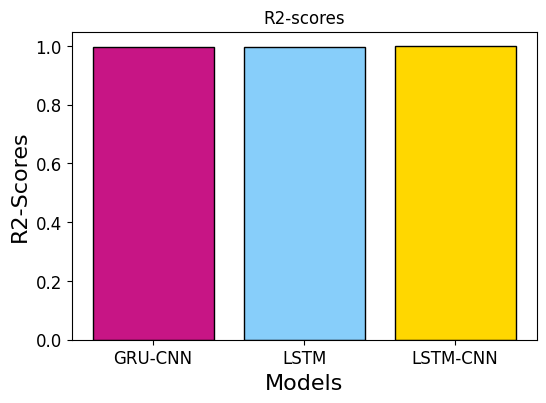

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['GRU-CNN','LSTM', 'LSTM-CNN']
y = [gru_r2_score, lstm_r2_score, lstm_cnn_r2_score]
width = 0.2
colors = ['mediumvioletred','lightskyblue', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3], y, color=colors, edgecolor='black')

plt.xlabel('Models', fontsize=16)
plt.ylabel('R2-Scores', fontsize=16)
plt.xticks([1, 2, 3], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("R2-scores")



plt.show()

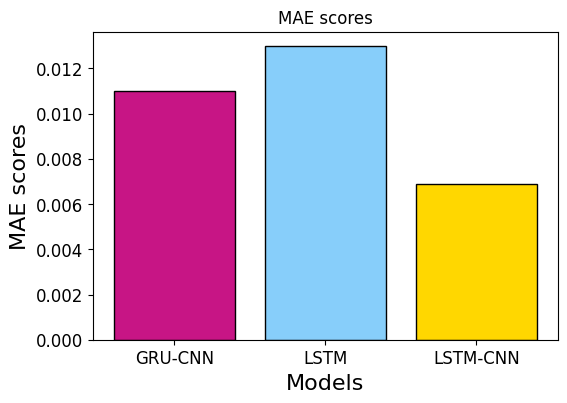

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['GRU-CNN','LSTM', 'LSTM-CNN']
y = [gru_mae_score, lstm_mae, lstm_cnn_mae]
width = 0.2
colors = ['mediumvioletred','lightskyblue', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3], y, color=colors, edgecolor='black')

plt.xlabel('Models', fontsize=16)
plt.ylabel('MAE scores', fontsize=16)
plt.xticks([1, 2, 3], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("MAE scores")



plt.show()

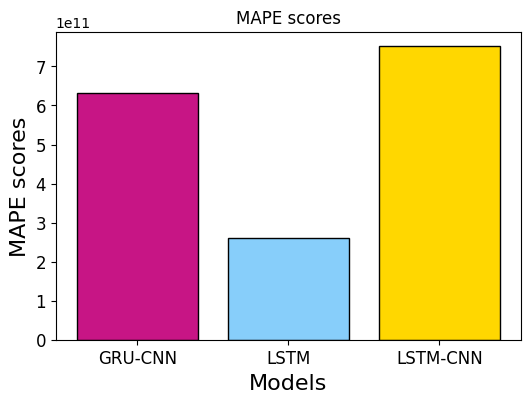

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['GRU-CNN','LSTM', 'LSTM-CNN']
y = [gru_mape_score, lstm_mape, lstm_cnn_mape]
width = 0.2
colors = ['mediumvioletred','lightskyblue', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3], y, color=colors, edgecolor='black')

plt.xlabel('Models', fontsize=16)
plt.ylabel('MAPE scores', fontsize=16)
plt.xticks([1, 2, 3], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("MAPE scores")



plt.show()

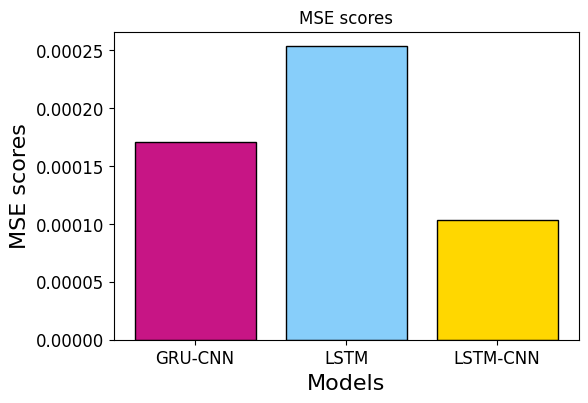

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['GRU-CNN','LSTM', 'LSTM-CNN']
y = [gru_mse_score, lstm_mse, lstm_cnn_mse]
width = 0.2
colors = ['mediumvioletred','lightskyblue', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3], y, color=colors, edgecolor='black')

plt.xlabel('Models', fontsize=16)
plt.ylabel('MSE scores', fontsize=16)
plt.xticks([1, 2, 3], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("MSE scores")



plt.show()

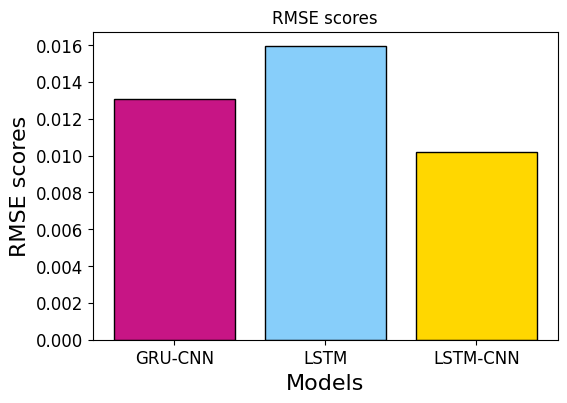

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = ['GRU-CNN','LSTM', 'LSTM-CNN']
y = [gru_rmse_score, lstm_rmse, lstm_cnn_rmse]
width = 0.2
colors = ['mediumvioletred','lightskyblue', 'gold']

fig, ax = plt.subplots(figsize=(6,4))

bars = plt.bar([1, 2, 3], y, color=colors, edgecolor='black')

plt.xlabel('Models', fontsize=16)
plt.ylabel('RMSE scores', fontsize=16)
plt.xticks([1, 2, 3], x, fontsize=12)
plt.yticks(fontsize=12)
plt.title("RMSE scores")



plt.show()